# Gradient Descent Lab: Logical Problem Solving & Parameter Tuning

This notebook addresses the bug fix in the Gradient Descent update rule and simulates the effect of different learning rates.

## Task 1: The "Bug Hunt"

### Problem Statement
In Gradient Descent, we want to minimize the loss function. The gradient tells us the direction of the steepest *increase*. To go *downhill*, we must subtract the gradient from our weight, not add it.

### Requirement
**Explanation**: Adding the gradient instead of subtracting it makes the model "climb the hill" because the gradient points in the direction of the steepest ascent, so moving toward it increases the loss rather than minimizing it.

Running with corrected logic (Subtraction):
Iteration 0, Loss: 24.0100
Iteration 10, Loss: 16.0293
Iteration 20, Loss: 10.7013
Iteration 30, Loss: 7.1443
Iteration 40, Loss: 4.7696
Iteration 50, Loss: 3.1842
Iteration 60, Loss: 2.1258
Iteration 70, Loss: 1.4192
Iteration 80, Loss: 0.9475
Iteration 90, Loss: 0.6325


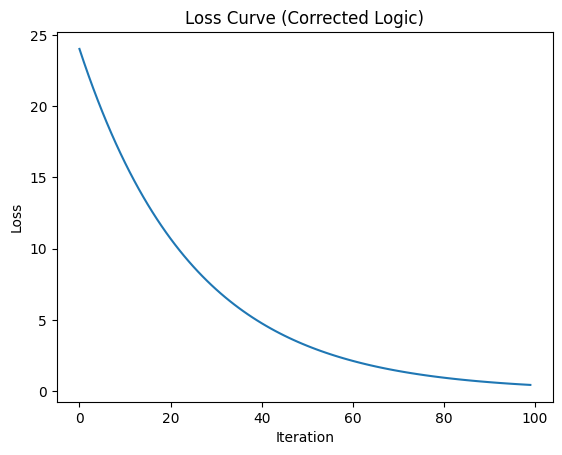

In [1]:
# CORRECTED CODE SNIPPET
import matplotlib.pyplot as plt
import numpy as np

def calculate_loss(weight):
    return weight**2  # Simple convex loss function (parabola)

def calculate_gradient(weight):
    return 2 * weight  # Derivative of weight^2

learning_rate = 0.01
weight = 5.0
losses = []

print("Running with corrected logic (Subtraction):")
for i in range(100):
    gradient = calculate_gradient(weight)
    # FIXED: Subtraction instead of addition
    weight = weight - (learning_rate * gradient)
    loss = calculate_loss(weight)
    losses.append(loss)
    if i % 10 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

plt.plot(losses)
plt.title("Loss Curve (Corrected Logic)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## Task 2: Testing the "Step Size"

We will run the simulation with two different learning rates:
1. `learning_rate = 0.000001` (Very slow)
2. `learning_rate = 0.1` (Reasonable/Quickly converging)

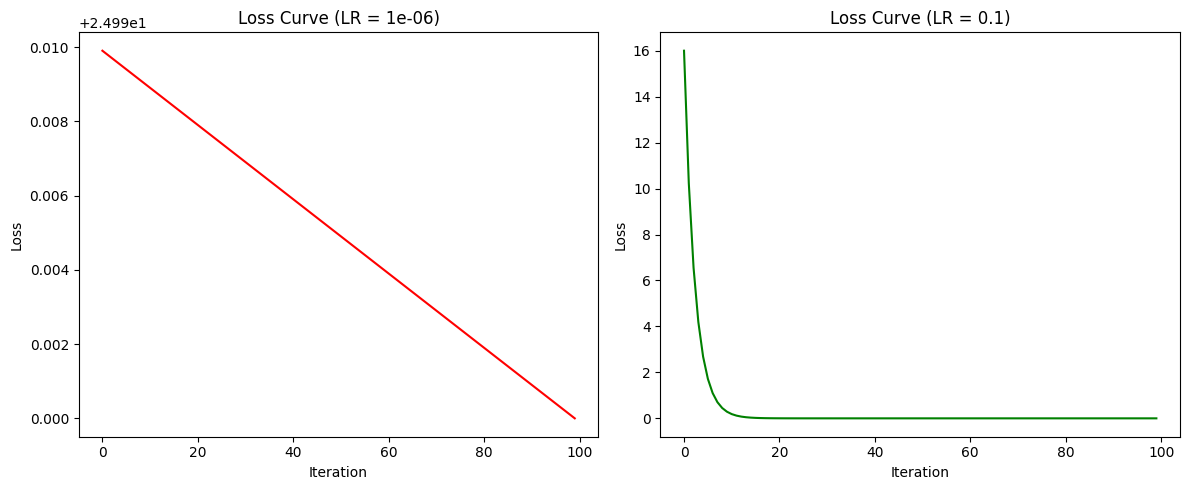

In [2]:
def run_simulation(lr, iterations=100):
    weight = 5.0
    losses = []
    for _ in range(iterations):
        gradient = calculate_gradient(weight)
        weight = weight - (lr * gradient)
        losses.append(calculate_loss(weight))
    return losses

lr_slow = 0.000001
lr_fast = 0.1

losses_slow = run_simulation(lr_slow)
losses_fast = run_simulation(lr_fast)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_slow, color='red')
plt.title(f"Loss Curve (LR = {lr_slow})")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(losses_fast, color='green')
plt.title(f"Loss Curve (LR = {lr_fast})")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

### Submission Analysis

*   **Corrected Code**: Handled in the cells above (using `-` for weight update).
*   **Loss Curve Screenshot**: Visualized in the plots above.
*   **Learning Rate Analysis**:
    *   **LR = 0.000001**: This rate was **"too slow"**. The loss barely decreases over 100 iterations because the steps are microscopic.
    *   **LR = 0.1**: This rate **"converged"** quickly. The loss reaches near-zero very rapidly, finding the "bottom" of the hill efficiently.